**2021 Airbnb Data for NYC**

In [ ]:
# Dataset from https://www.kaggle.com/sarthakniwate13/air-bnb-nyc-data

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(14.7,10)})

**Questions Trying to answer:**
  1. How long does someone typically rent out an AirBnB
    - Which borough has the lowest minimum nights?
    - Which borough has the highest or lowest prices per night?
  2. What kind of properties are rented out the most?
    - What kind of price point have the most reviews?
  3. Is there a relationship between the number of reviews and the price?
  4. How does prices per night compare with a place like california?

In [ ]:
# Reading from csv

df = pd.read_csv("Airbnb_NYC.csv")
df.head

<bound method NDFrame.head of             Boroughs  Latitude  Longitude  ... Review_Cnt  Reviews30d  Price
0              Bronx  40.80011  -73.91330  ...         19        0.27   60.0
1              Bronx  40.80024  -73.91422  ...         59        2.93   49.0
2              Bronx  40.80074  -73.91574  ...          3        0.87   50.0
3              Bronx  40.80091  -73.91449  ...         18        0.36   71.0
4              Bronx  40.80143  -73.91353  ...         12        3.50  115.0
...              ...       ...        ...  ...        ...         ...    ...
38728  Staten Island  40.64641  -74.08502  ...         58        4.73  130.0
38729  Staten Island  40.64682  -74.08734  ...         58        1.05   43.0
38730  Staten Island  40.64730  -74.08408  ...         85        1.35  105.0
38731  Staten Island  40.64762  -74.08682  ...          5        1.88  135.0
38732  Staten Island  40.64779  -74.08460  ...        108        2.32  140.0

[38733 rows x 10 columns]>

**Latitude and Longitude** - Geographical location of the property

**Prop_Type** - The type of property as Private Room, Entire House

**Min_Nights** - Minimum nights of stay

**Host_Listing_Cnt** - How long they have listed it

**Days_Available** - Availability of property in days

**Review_Cnt** - Count of reviews in the property

**Reviews30d** - Activeness of reviews/ how many reviews have been posted in 30 days

**Price** - What is the market price they are askin for

In [ ]:
# Dropping missing data that has no prices associated with the airbnb listing
df = df.dropna(subset=["Price"], axis=0)

In [ ]:
boroughs = df["Boroughs"].unique()
prop_types = df["Prop_Type"].unique()
df.describe()

,Latitude,Longitude,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,38724.000000,38724.000000,38686.000000,38369.000000,38724.00000,38724.000000,38724.000000,38724.000000
mean,40.727856,-73.950741,5.522980,2.987151,114.22539,29.508728,1.365624,140.879248
std,0.055278,0.047170,10.817101,8.414091,130.17846,48.655314,1.692818,194.490892
min,40.506410,-74.244420,1.000000,1.000000,0.00000,1.000000,0.010000,10.000000
25%,40.688450,-73.982300,1.000000,1.000000,0.00000,3.000000,0.190000,68.000000
50%,40.721490,-73.954610,2.000000,1.000000,50.00000,10.000000,0.710000,100.000000
75%,40.762820,-73.934480,4.000000,2.000000,234.00000,33.000000,2.000000,169.000000
max,40.912400,-73.712990,300.000000,96.000000,365.00000,639.000000,66.610000,10000.000000


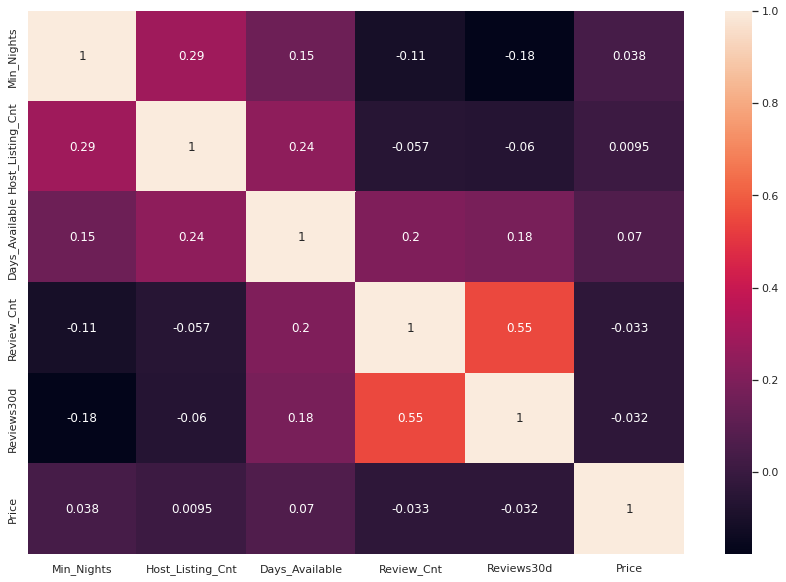

In [ ]:
from numpy.lib.function_base import corrcoef

sns.heatmap(df.drop(['Longitude', 'Latitude'], axis=1).corr(), annot=True)

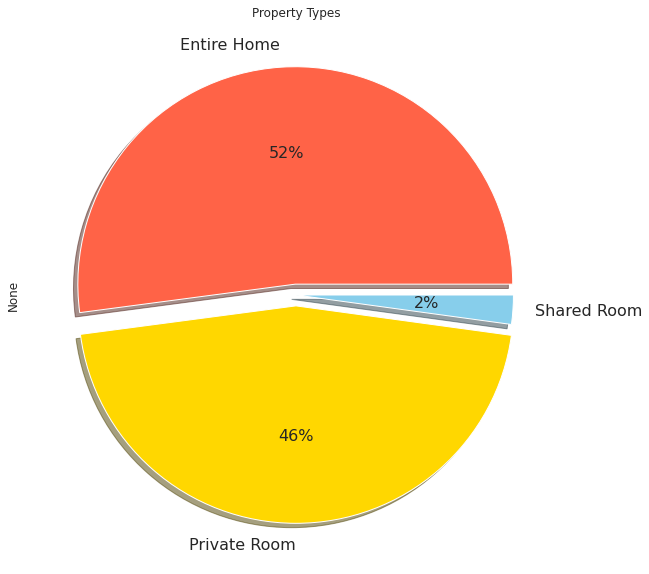

In [ ]:
# Creates the labels for each category in Property Type
def label_function(val):
    return f'{val:.0f}%'

explode = (0.05, 0.05, 0)

df.groupby('Prop_Type').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 16},
                                  colors=['tomato', 'gold', 'skyblue'], title="Property Types", labels=["Entire Home",  "Private Room", "Shared Room"], explode=explode, shadow=True)


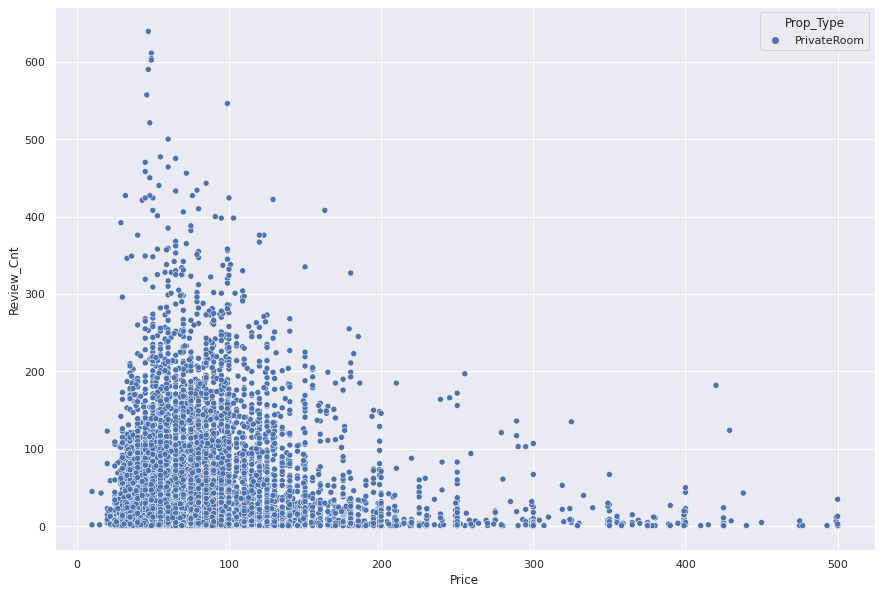

In [ ]:
# Most of the reviews are around the price point of the median price for private rooms of 75
sns.scatterplot(data=df[(df['Price'] <= 500 ) & (df['Prop_Type']=='PrivateRoom')], x="Price", y="Review_Cnt", hue="Prop_Type")

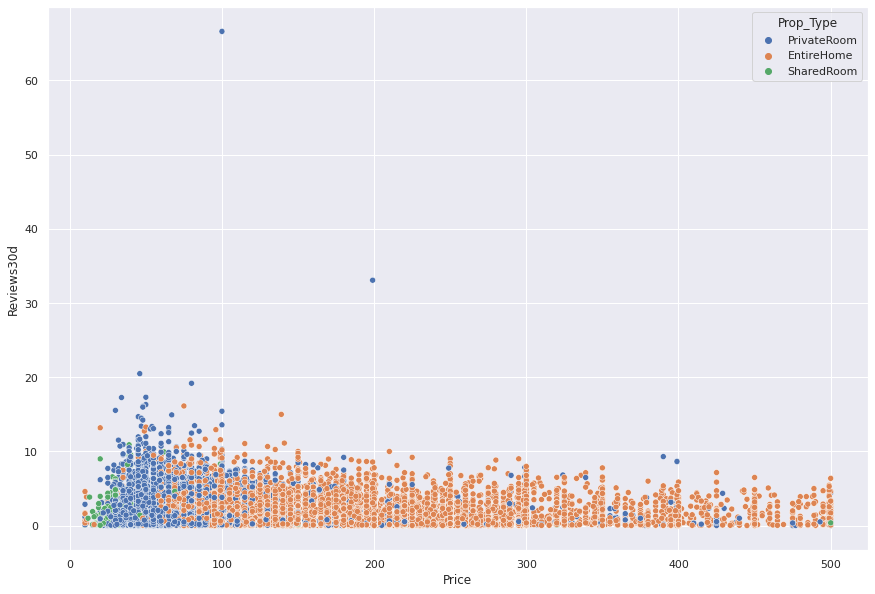

In [ ]:
sns.scatterplot(data=df[df['Price'] <= 500], x="Price", y="Reviews30d", hue="Prop_Type")

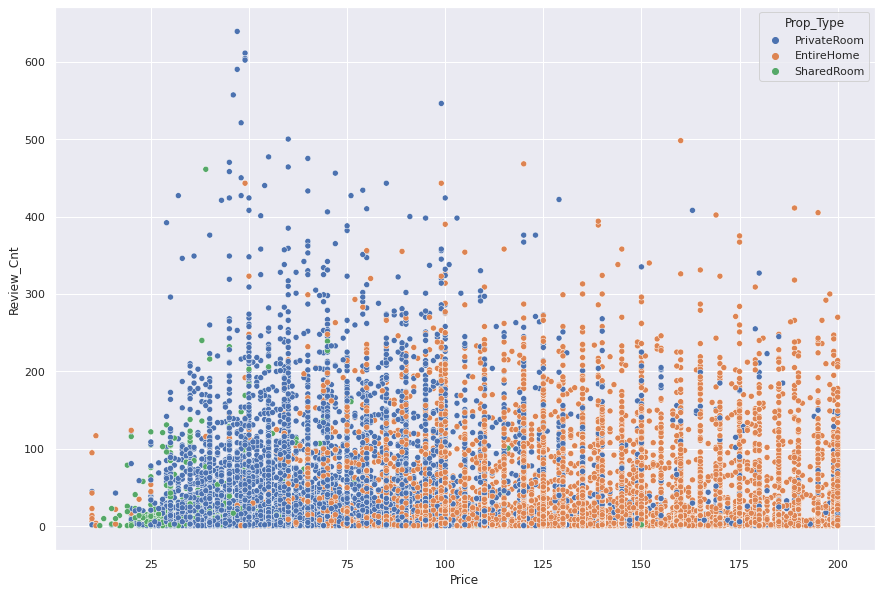

In [ ]:
sns.scatterplot(data=df[df['Price'] <= 200], x="Price", y="Review_Cnt", hue="Prop_Type")

In [ ]:
med_price_of_shared_room = df[df['Prop_Type'] == 'SharedRoom']['Price'].median()
med_price_of_private_room = df[df['Prop_Type'] == 'PrivateRoom']['Price'].median()
med_price_of_entire_house = df[df['Prop_Type'] == 'EntireHome']['Price'].median()

df[df['Prop_Type'] == 'SharedRoom'].describe()



,Latitude,Longitude,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,40.734294,-73.942688,4.140811,4.840095,169.105012,23.491647,1.492947,63.109785
std,0.062346,0.049037,9.228118,6.292604,150.093538,39.170574,1.636828,95.722992
min,40.576360,-74.131130,1.000000,1.000000,0.000000,1.000000,0.020000,10.000000
25%,40.692405,-73.980955,1.000000,1.000000,5.000000,3.000000,0.280000,32.000000
50%,40.740880,-73.950700,1.000000,3.000000,126.000000,9.000000,1.000000,45.000000
75%,40.767138,-73.922800,3.000000,6.000000,342.000000,25.000000,2.097500,69.000000
max,40.897850,-73.719280,100.000000,36.000000,365.000000,461.000000,10.900000,1800.000000


In [ ]:
df[df['Prop_Type'] == 'PrivateRoom'].describe()

,Latitude,Longitude,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,17714.000000,17714.000000,17704.000000,17637.000000,17714.000000,17714.000000,17714.000000,17714.000000
mean,40.729275,-73.942105,4.370707,2.608777,115.090663,30.713108,1.433753,83.992661
std,0.058680,0.048829,9.421168,4.400397,131.189635,51.929501,1.833939,146.500472
min,40.542680,-74.173880,1.000000,1.000000,0.000000,1.000000,0.010000,10.000000
25%,40.688750,-73.967838,1.000000,1.000000,0.000000,3.000000,0.200000,50.000000
50%,40.717840,-73.947605,2.000000,1.000000,54.000000,10.000000,0.760000,70.000000
75%,40.764960,-73.924482,3.000000,3.000000,228.000000,35.000000,2.060000,91.000000
max,40.912400,-73.712990,300.000000,96.000000,365.000000,639.000000,66.610000,10000.000000


In [ ]:
df[df['Prop_Type'] == 'EntireHome'].describe()

,Latitude,Longitude,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,20172.000000,20172.000000,20144.000000,19894.000000,20172.000000,20172.000000,20172.000000,20172.000000
mean,40.726342,-73.958660,6.593179,3.244546,111.185703,28.701071,1.300507,194.064842
std,0.051723,0.044125,11.865162,10.834063,127.864757,45.929383,1.558080,217.871630
min,40.506410,-74.244420,1.000000,1.000000,0.000000,1.000000,0.010000,10.000000
25%,40.688027,-73.986740,2.000000,1.000000,0.000000,3.000000,0.180000,115.000000
50%,40.723620,-73.962215,3.000000,1.000000,43.000000,9.000000,0.650000,150.000000
75%,40.760940,-73.942980,5.000000,1.000000,232.000000,32.000000,2.000000,219.000000
max,40.903910,-73.725820,265.000000,96.000000,365.000000,498.000000,16.130000,10000.000000


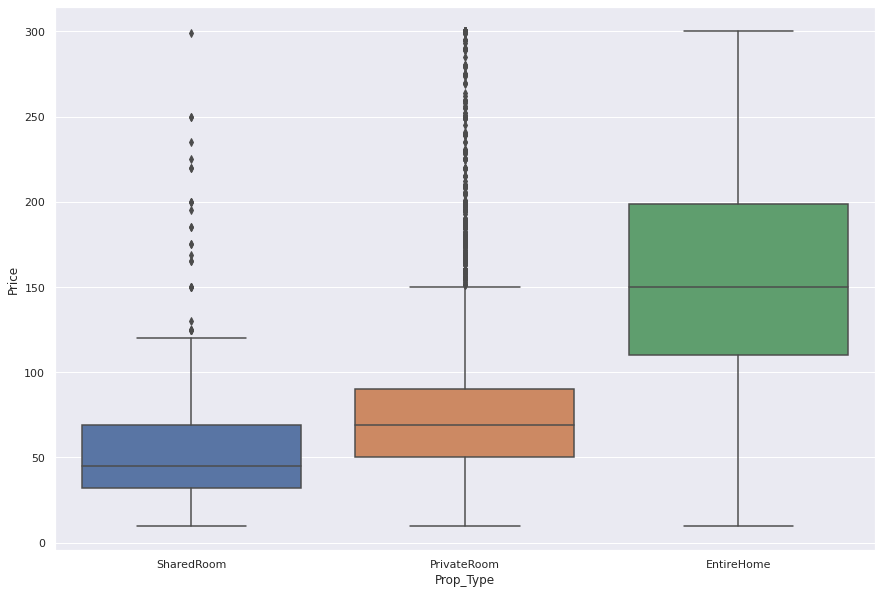

In [ ]:
sns.boxplot(data=df[df['Price'] <= 300], x="Prop_Type", y="Price", order=["SharedRoom", "PrivateRoom", "EntireHome"])

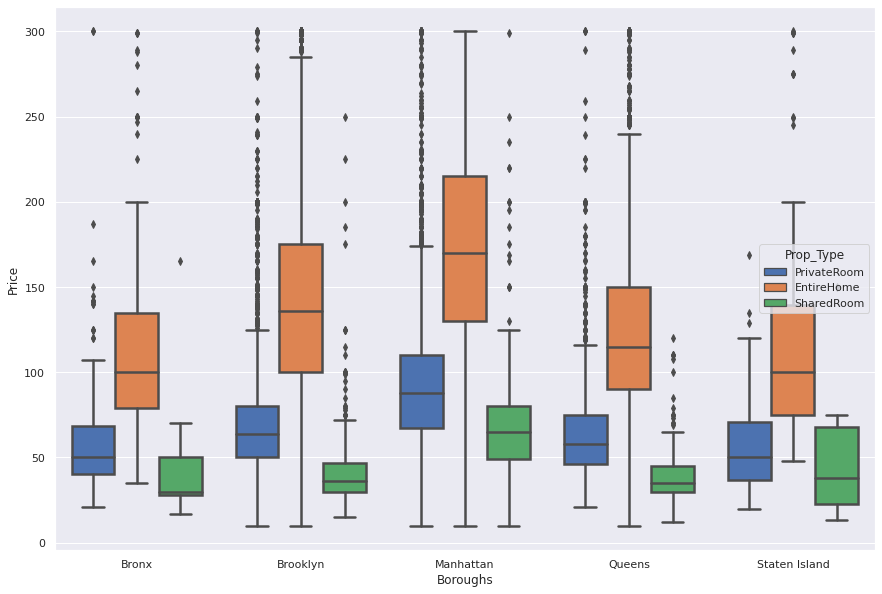

In [ ]:

# T
sns.boxplot(data=df[df['Price'] <= 300], x="Boroughs", y="Price", hue="Prop_Type", linewidth=2.5, saturation=1)

In [ ]:
df[(df['Boroughs'] == 'Manhattan Boroughs')].describe() 

,Latitude,Longitude,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
